In [19]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#import data
data = pd.read_csv("uber.csv")

In [20]:
df = data.copy()
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
# df.corr()
df.dropna(inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc750740df0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc750740a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc7508d8670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc750741810>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc750740f70>],
 'means': []}

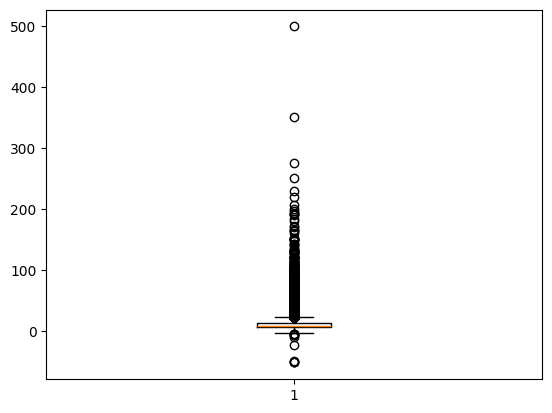

In [21]:
plt.boxplot(df['fare_amount'])


In [22]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

In [23]:
from sklearn.model_selection import train_test_split
#Take x as predictor variable
x = df.drop("fare_amount", axis = 1)
#And y as target variable
y = df['fare_amount']
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))
x = x.loc[:, x.columns.str.contains('^Unnamed')]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [24]:
predict = lrmodel.predict(x_test)
#Check Error
from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(predict, y_test))
print("RMSE error for the model is ", lrmodelrmse)


RMSE error for the model is  8.063863046328835


In [25]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)

RMSE value for Random Forest is: 9.757713738069647


: 